In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#library
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input
from keras.models import Sequential ,load_model,Model
from keras.layers import LSTM,GRU,Dense,Flatten ,Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

##Module : Đoán Tọa Độ Kế Tiếp
##**Xử lí dữ liệu huấn luyện**

In [ ]:
x_start_df_train = pd.read_csv("/content/drive/MyDrive/Warning_collision/export_data_x_start_train_20.csv",names = list(range(1,22,1)))
x_end_df_train = pd.read_csv("/content/drive/MyDrive/Warning_collision/export_data_x_end_train_20.csv",names = list(range(1,22,1)))
y_start_df_train = pd.read_csv("/content/drive/MyDrive/Warning_collision/export_data_y_start_train_20.csv",names = list(range(1,22,1)))
y_end_df_train = pd.read_csv("/content/drive/MyDrive/Warning_collision/export_data_y_end_train_20.csv",names = list(range(1,22,1)))

In [ ]:
x_start_df_train

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1,-1,-1,1037,1037,1037,1038,1038,1038,1038,...,1038,1037,1038,1037,1038,1038,1038,1038,1038,1038
1,-1,-1,1037,1037,1037,1038,1038,1038,1038,1038,...,1037,1038,1037,1038,1038,1038,1038,1038,1038,1038
2,-1,1037,1037,1037,1038,1038,1038,1038,1038,1038,...,1038,1037,1038,1038,1038,1038,1038,1038,1038,1038
3,1037,1037,1038,1038,1038,1038,1038,1038,1037,1038,...,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038
4,1037,1038,1038,1038,1038,1038,1038,1037,1038,1037,...,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745193,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,...,1048,1048,1048,1048,1048,1048,1048,1048,1048,1049
745194,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,...,1048,1048,1048,1048,1048,1048,1048,1048,1049,1048
745195,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,...,1048,1048,1048,1048,1048,1048,1048,1049,1048,1048
745196,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,...,1048,1048,1048,1048,1048,1048,1049,1048,1048,1048


In [ ]:
x_end_df_train

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1,-1,-1,1054,1055,1055,1055,1055,1055,1055,...,1055,1054,1055,1054,1055,1055,1055,1055,1055,1055
1,1055,1055,1055,1055,1055,1055,1055,1055,1054,1055,...,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055
2,1055,1055,1055,1055,1055,1055,1054,1055,1054,1055,...,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055
3,1055,1055,1055,1055,1054,1055,1054,1055,1055,1055,...,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055
4,1055,1055,1055,1054,1055,1054,1055,1055,1055,1055,...,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745193,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
745194,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
745195,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
745196,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080


In [ ]:
y_start_df_train

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,345,345,345,345,345,345,345,345,345,346,...,346,345,345,345,345,345,345,345,345,346
1,345,345,345,345,345,345,346,345,346,345,...,345,345,345,345,345,345,346,346,346,346
2,345,345,345,345,345,346,345,346,345,345,...,345,345,345,345,345,346,346,346,346,346
3,345,345,345,345,346,345,346,345,345,345,...,345,345,345,345,346,346,346,346,346,345
4,345,345,346,345,346,345,345,345,345,345,...,345,345,346,346,346,346,346,345,345,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745193,402,402,402,402,402,402,402,402,402,402,...,402,402,402,402,402,402,402,402,402,402
745194,402,402,402,402,402,402,402,402,402,402,...,402,402,402,402,402,402,402,402,402,402
745195,402,402,402,402,402,402,402,402,402,402,...,402,402,402,402,402,402,402,402,402,402
745196,402,402,402,402,402,402,402,402,402,402,...,402,402,402,402,402,402,402,402,402,402


In [ ]:
y_end_df_train

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1,-1,394,394,394,394,394,394,394,394,...,395,395,395,395,395,395,395,395,395,395
1,-1,394,394,394,394,394,394,394,394,395,...,395,395,395,395,395,395,395,395,395,395
2,394,394,394,394,394,394,394,394,395,395,...,395,395,395,395,395,395,395,395,395,394
3,394,394,394,394,394,394,395,395,395,395,...,395,395,395,395,395,395,395,394,394,394
4,394,394,394,394,394,395,395,395,395,395,...,395,395,395,395,395,395,394,394,394,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745193,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461
745194,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461
745195,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461
745196,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461


#Xử lí các cột có chứa -1

In [ ]:
def deal_with_interuption(table_name):
    # Chuyển bảng dữ liệu thành mảng numpy và sau đó thành mảng 1 chiều
    ori_table = table_name.to_numpy()  # Đọc bảng dữ liệu -> sang ma trận
    table = ori_table.reshape((ori_table.shape[0] * ori_table.shape[1],))  # Chuyển từ 2d về 1d

    queue = []  # Hàng chờ (FIFO), chứa các vị trí có giá trị -1

    # Đọc từng vị trí trong table và khi gặp -1 thì cho vào hàng chờ
    for idx, index in enumerate(table):
        if index == -1:
            queue.append(idx)

    # Lấy các phần tử trong hàng chờ cho đến khi không còn -1 trong hàng chờ
    while len(queue) != 0:
        top = queue.pop(0)  # Lấy giá trị đầu tiên và loại bỏ nó khỏi hàng chờ

        # Nếu vị trí -1 nằm cuối cùng thì không có giá trị đằng sau
        if top == len(table) - 1:
            # Điền giá trị đằng trước -1
            table[top] = table[top - 1]
            # Nếu sau khi điền vẫn là -1 tức là vị trí trước đó cũng có giá trị -1 thì ta cho lại vào hàng chờ để xử lý tiếp
            if table[top] == -1:
                queue.append(top)
            continue  # Tiếp tục vòng lặp

        # Nếu giá trị sau đó khác -1
        if table[top + 1] > -1:
            # Điền bằng giá trị sau
            table[top] = table[top + 1]
        else:
            # Nếu vị trí đầu tiên -1 không có giá trị đằng trước
            if top != 0:
                table[top] = table[top - 1]
            # Nếu sau khi điền vào table vẫn là -1 thì cho vào queue chờ xử lý
            if table[top] == -1:
                queue.append(top)

    # Chuyển lại từ 1 chiều về 2 chiều
    table = table.reshape((ori_table.shape[0], ori_table.shape[1]))
    return table

In [ ]:
#xử lí dữ liệu -1
x_start_df_train = deal_with_interuption(x_start_df_train)
x_end_df_train = deal_with_interuption(x_end_df_train)
y_start_df_train = deal_with_interuption(y_start_df_train)
y_end_df_train = deal_with_interuption(y_end_df_train)

In [ ]:
#kiểm tra lại dữ liệu sau khi xử lí
x_start_df_train

array([[1037, 1037, 1037, ..., 1038, 1038, 1038],
       [1038, 1037, 1037, ..., 1038, 1038, 1038],
       [1037, 1037, 1037, ..., 1038, 1038, 1038],
       ...,
       [1048, 1048, 1048, ..., 1049, 1048, 1048],
       [1048, 1048, 1048, ..., 1048, 1048, 1048],
       [1048, 1048, 1048, ..., 1048, 1048, 1049]])

In [ ]:
x_end_df_train

array([[1054, 1054, 1054, ..., 1055, 1055, 1055],
       [1055, 1055, 1055, ..., 1055, 1055, 1055],
       [1055, 1055, 1055, ..., 1055, 1055, 1055],
       ...,
       [1080, 1080, 1080, ..., 1080, 1080, 1080],
       [1080, 1080, 1080, ..., 1080, 1080, 1080],
       [1080, 1080, 1080, ..., 1080, 1080, 1080]])

In [ ]:
y_start_df_train

array([[345, 345, 345, ..., 345, 345, 346],
       [345, 345, 345, ..., 346, 346, 346],
       [345, 345, 345, ..., 346, 346, 346],
       ...,
       [402, 402, 402, ..., 402, 402, 402],
       [402, 402, 402, ..., 402, 402, 402],
       [402, 402, 402, ..., 402, 402, 402]])

In [ ]:
y_end_df_train

array([[394, 394, 394, ..., 395, 395, 395],
       [394, 394, 394, ..., 395, 395, 395],
       [394, 394, 394, ..., 395, 395, 394],
       ...,
       [461, 461, 461, ..., 461, 461, 461],
       [461, 461, 461, ..., 461, 461, 461],
       [461, 461, 461, ..., 461, 461, 461]])

In [ ]:
#calculate center coordinates
x_center_df_train = (x_start_df_train + x_end_df_train) /2
y_center_df_train = (y_start_df_train + y_end_df_train) / 2

In [ ]:
pd.DataFrame(x_center_df_train).to_csv("/content/drive/MyDrive/Warning_collision/my_x_center_train_20.csv")
pd.DataFrame(y_center_df_train).to_csv("/content/drive/MyDrive/Warning_collision/my_y_center_train_20.csv")

## Đọc lại bộ dữ liệu mới

In [ ]:
x_center_df_train = pd.read_csv("/content/drive/MyDrive/Warning_collision/my_x_center_train_20.csv",names = list(range(1,22,1)))
y_center_df_train = pd.read_csv("/content/drive/MyDrive/Warning_collision/my_y_center_train_20.csv",names = list(range(1,22,1)))

## Xây Dựng Model
### Neural Network

In [ ]:
def simple_NN(input_shape=(20,1)) :
    input = Input(shape = input_shape)
    x = Dense(16,activation ="relu")(input)
    x = Dropout(0.3)(x)
    x= Dense(8,activation = "relu")(x)
    x = Dropout(0.2)(x)
    output = Dense(1,activation = "linear")(x)

    model = Model(inputs = input ,outputs = output)
    model.summary()
    return model

### Vanilla LSTM

In [ ]:
def simple_vanilla_LSTM(input_shape = (20,1)):
    input = Input(shape = input_shape)
    x = LSTM(8)(input)
    x = Dense(4,activation ="relu")(x)
    x = Dropout(0.3)(x) #lọc bỏ kết nối giữa lớp dense bên trên và dưới ->chống overfit
    #định nghĩa đầu ra
    output = Dense(1,activation ="linear")(x)
    #định nghĩa mô hình
    model = Model(inputs = input , outputs  = output)
    model.summary()
    return model


In [ ]:
vanilla = simple_vanilla_LSTM()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 4)                 36        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Huấn luyện mô hình
## Tọa Độ x

In [ ]:

# Ví dụ x = np.array([[0,1,2],[2,3,4]]) --> x[:,:2] = [[0,1],[2,3]]

# Giả định hàm my_min_max_scaler được định nghĩa ở đâu đó
def my_min_max_scaler(df, max_value):
    return df / max_value

#x_center_df_train = np.array([[0, 1, 2], [2, 3, 4]])  # Ví dụ dữ liệu
# Ví dụ x = np.array([[0,1,2],[2,3,4]]) --> x[:,:2] = [[0,1],[2,3]]
# Chuẩn hóa dữ liệu
df_train = my_min_max_scaler(x_center_df_train, 1599.0)

# Tách dữ liệu thành các đặc trưng (features) và nhãn (labels)
X_x = df_train.iloc[:, :(df_train.shape[1] - 1)]  # Tất cả các cột trừ cột cuối cùng
y_x = df_train.iloc[:, (df_train.shape[1] - 1)]  # Cột cuối cùng

# In ra kích thước của X_x và y_x
print(X_x.shape)
print(y_x.shape)


(745199, 20)
(745199,)


In [ ]:
# Chia thêm tập xác thực tỉ lệ 80:20
X_x_train, X_x_val, y_x_train, y_x_val = train_test_split(X_x, y_x, test_size = 0.2)
X_x_train = X_x_train.values.reshape((X_x_train.shape[0], X_x_train.shape[1], 1))
X_x_val = X_x_val.values.reshape((X_x_val.shape[0], X_x_val.shape[1], 1))
print(X_x_train.shape)
print(X_x_val.shape)

(596159, 20, 1)
(149040, 20, 1)


In [ ]:
#compile mô hình : loss là MSE ,optimizer là Adam
#lưu lại mô hình tốt nhất : tạo callback chứa modelCheckpoint(lưu file model ,save_best_only,monitor,...)
#monitor : là lưu mô hình tốt nhất theo tiêu chí nào
#save_best_only : chỉ lưu mô hình tốt nhất
vanilla.compile(loss = "mean_squared_error",optimizer = Adam(learning_rate = 0.001))
callback = [ModelCheckpoint("/content/drive/MyDrive/Warning_collision/Best model for x/LSTM_x.h5",save_best_only = True,monitor ="val_loss")]

batch_size = 64 #kích cỡ của 1 batch
steps_per_epoch = X_x_train.shape[0] // 64 +1
validation_step = X_x_val.shape[0] // 64 +1
history = vanilla.fit(X_x_train,y_x_train,validation_data =(X_x_val,y_x_val),epochs = 10,batch_size = 64,steps_per_epoch=steps_per_epoch,callbacks = callback,validation_steps = validation_step)

Epoch 1/10
9313/9315 [============================>.] - ETA: 0s - loss: 0.0294

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9315/9315 [==============================] - 116s 12ms/step - loss: 0.0294 - val_loss: 0.0079
Epoch 2/10
9315/9315 [==============================] - 109s 12ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 3/10
9315/9315 [==============================] - 109s 12ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 4/10
9315/9315 [==============================] - 112s 12ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 5/10
9315/9315 [==============================] - 111s 12ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 6/10
9315/9315 [==============================] - 113s 12ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 7/10
9315/9315 [==============================] - 110s 12ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 8/10
9315/9315 [==============================] - 110s 12ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 9/10
9315/9315 [==============================] - 113s 12ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 10/10
9315/9315 [==============================] - 109s 12ms

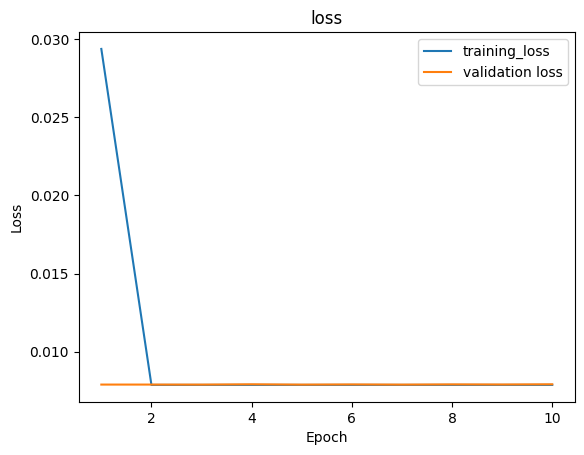

In [ ]:
#vẽ hình xem loss của train và val
numOfEpoch = 10
plt.plot(list(map(int,np.linspace(1,numOfEpoch,10))),history.history['loss'],label ="training_loss")
plt.plot(list(map(int, np.linspace(1, numOfEpoch, 10))), history.history['val_loss'], label='validation loss')
plt.title("loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### NN

In [ ]:
def neural_network_model(input_shape = (20,1)):
    input = Input(shape = input_shape)
    x = Dense(16,activation ="relu")(input)
    x = Dense(8,activation ="relu")(x)
    x = Dropout(0.3)(x) #lọc bỏ kết nối giữa lớp dense bên trên và dưới ->chống overfit
    #định nghĩa đầu ra
    output = Dense(1,activation ="linear")(x)
    #định nghĩa mô hình
    model = Model(inputs = input , outputs  = output)
    model.summary()
    return model

In [ ]:
nn = neural_network_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 dense_2 (Dense)             (None, 20, 16)            32        
                                                                 
 dense_3 (Dense)             (None, 20, 8)             136       
                                                                 
 dropout_1 (Dropout)         (None, 20, 8)             0         
                                                                 
 dense_4 (Dense)             (None, 20, 1)             9         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
nn.compile(loss ="mean_squared_error",optimizer = Adam(learning_rate = 0.001))
callback =[ModelCheckpoint("/content/drive/MyDrive/Warning_collision/Best model for x/nn_x.h5",save_best_only = True,monitor = "val_loss")]
steps_per_epoch = X_x_train.shape[0] //256 + 1
validation_step = X_x_val.shape[0] // 256 + 1
history = nn.fit(X_x_train,y_x_train,validation_data =(X_x_val,y_x_val),epochs = 5,batch_size = 256,steps_per_epoch = steps_per_epoch,callbacks = callback,validation_steps = validation_step)


Epoch 1/5
2329/2329 [==============================] - 21s 8ms/step - loss: 0.0315 - val_loss: 0.0017
Epoch 2/5
2329/2329 [==============================] - 15s 7ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 3/5
2329/2329 [==============================] - 15s 6ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 4/5
2329/2329 [==============================] - 15s 6ms/step - loss: 0.0022 - val_loss: 9.9079e-04
Epoch 5/5
2329/2329 [==============================] - 16s 7ms/step - loss: 0.0019 - val_loss: 9.6519e-04


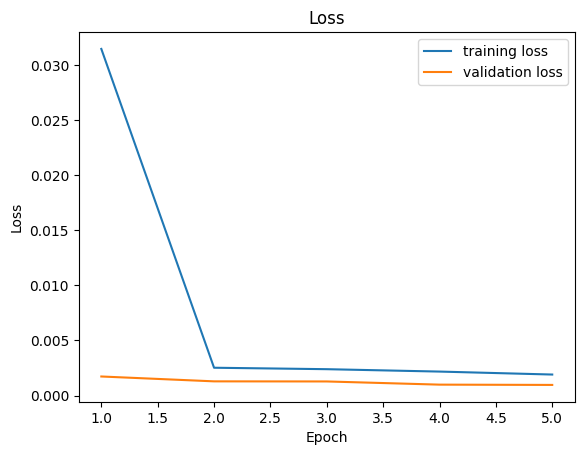

In [ ]:
numOfEpoch = 5
plt.plot(list(map(int, np.linspace(1, numOfEpoch, 5))), history.history['loss'], label='training loss')
plt.plot(list(map(int, np.linspace(1, numOfEpoch, 5))), history.history['val_loss'], label='validation loss')
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Test

In [ ]:
x_start_df_test = pd.read_csv("/content/drive/MyDrive/Warning_collision/test/export_data_x_start_test_20.csv",names = list(range(1,22,1)))
x_end_df_test = pd.read_csv("/content/drive/MyDrive/Warning_collision/test/export_data_x_end_test_20.csv",names = list(range(1,22,1)))
y_start_df_test = pd.read_csv("/content/drive/MyDrive/Warning_collision/test/export_data_y_start_test_20.csv",names = list(range(1,22,1)))
y_end_df_test = pd.read_csv("/content/drive/MyDrive/Warning_collision/test/export_data_y_end_test_20.csv",names = list(range(1,22,1)))

In [ ]:
#xử lí dữ liệu -1
x_start_df_test = deal_with_interuption(x_start_df_test)
x_end_df_test = deal_with_interuption(x_end_df_test)
y_start_df_test = deal_with_interuption(y_start_df_test)
y_end_df_test = deal_with_interuption(y_end_df_test)

In [ ]:
x_start_df_test

array([[1037, 1037, 1037, ..., 1038, 1038, 1038],
       [1038, 1038, 1038, ..., 1038, 1038, 1038],
       [1038, 1038, 1038, ..., 1038, 1038, 1038],
       ...,
       [1144, 1144, 1144, ..., 1144, 1144, 1144],
       [1144, 1144, 1144, ..., 1144, 1144, 1144],
       [1144, 1144, 1144, ..., 1144, 1144, 1144]])

In [ ]:
x_start_df_test

array([[1037, 1037, 1037, ..., 1038, 1038, 1038],
       [1038, 1038, 1038, ..., 1038, 1038, 1038],
       [1038, 1038, 1038, ..., 1038, 1038, 1038],
       ...,
       [1144, 1144, 1144, ..., 1144, 1144, 1144],
       [1144, 1144, 1144, ..., 1144, 1144, 1144],
       [1144, 1144, 1144, ..., 1144, 1144, 1144]])

In [ ]:
#tính tọa độ center
x_center_df_test = (x_start_df_test + x_end_df_test)/2
y_center_df_test = (y_start_df_test + y_end_df_test)/2

In [ ]:
#lưu file csv cho file dữ liệu center
pd.DataFrame(x_center_df_test).to_csv("/content/drive/MyDrive/Warning_collision/test/my_x_center_test_20.csv",index = False)
pd.DataFrame(y_center_df_test).to_csv("/content/drive/MyDrive/Warning_collision/test/my_y_center_test_20.csv",index = False)

In [ ]:
df_test = my_min_max_scaler(x_center_df_test,1599.0)
X_x = df_test[:, :(df_test.shape[1] - 1)]  # Tất cả các cột trừ cột cuối cùng
y_x = df_test[:, (df_test.shape[1] - 1)]

# In ra kích thước của X_x và y_x
print(X_x.shape)
print(y_x.shape)

(319372, 20)
(319372,)


In [ ]:
X_x = X_x.reshape((X_x.shape[0],X_x.shape[1]))
model = load_model("/content/drive/MyDrive/Warning_collision/Best model for x/LSTM_x.h5")
model.evaluate(X_x,y_x)

9981/9981 [==============================] - 41s 4ms/step - loss: 0.0062


0.006189331412315369

##Test NN

In [ ]:
model_nn = load_model("/content/drive/MyDrive/Warning_collision/Best model for x/nn_x.h5")
model_nn.evaluate(X_x,y_x)

9981/9981 [==============================] - 20s 2ms/step - loss: 0.0014


0.0014190345536917448

## Tọa Độ Y

In [ ]:
#chiều cao tối đa là 1080 nên tọa độ lớn nhất là 1079
df_train = my_min_max_scaler(y_center_df_train ,1079.0)
X_x ,y_x = df_train.iloc[:,:(df_train.shape[1]-1)],df_train.iloc[:,(df_train.shape[1]-1)]
print(X_x.shape)
print(y_x.shape)

(745199, 20)
(745199,)


In [ ]:
X_x_train ,X_x_val ,y_x_train,y_x_val = train_test_split(X_x,y_x,test_size = 0.2)
X_x_train = X_x_train.values.reshape((X_x_train.shape[0],X_x_train.shape[1],1))
X_x_val = X_x_val.values.reshape((X_x_val.shape[0],X_x_val.shape[1],1))
print(X_x_train.shape)
print(X_x_val.shape)

(596159, 20, 1)
(149040, 20, 1)


In [ ]:
vanilla.compile(loss = "mean_squared_error",optimizer = Adam(learning_rate = 0.001))
callback = [ModelCheckpoint("/content/drive/MyDrive/Warning_collision/Best model for x/LSTM_y.h5",save_best_only = True , monitor = "val_loss")]
batch_size = 64
steps_per_epoch = X_x_train.shape[0] // batch_size + 1
steps_per_epoch = X_x_val.shape[0] //  batch_size + 1
history = vanilla.fit(X_x_train,y_x_train,validation_data =(X_x_val,y_x_val),epochs = 5,steps_per_epoch = steps_per_epoch ,callbacks = callback,validation_steps = validation_step)

Epoch 1/5
2326/2329 [============================>.] - ETA: 0s - loss: 0.0117

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2329/2329 [==============================] - 38s 14ms/step - loss: 0.0117 - val_loss: 0.0058
Epoch 2/5
2329/2329 [==============================] - 47s 20ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 3/5
2329/2329 [==============================] - 56s 24ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 4/5
2329/2329 [==============================] - 55s 24ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 5/5
2329/2329 [==============================] - 57s 25ms/step - loss: 0.0058 - val_loss: 0.0058


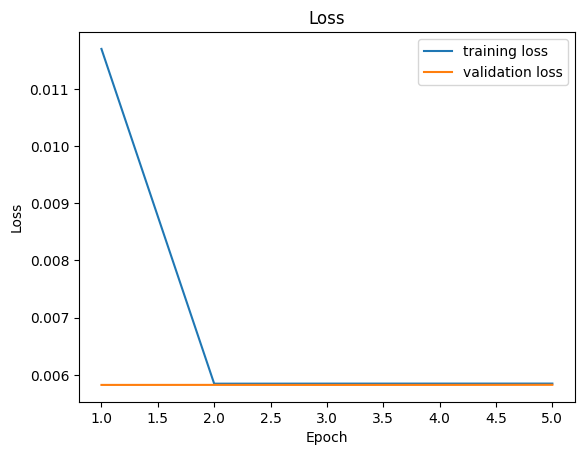

In [ ]:
numOfEpoch = 5
plt.plot(list(map(int, np.linspace(1, numOfEpoch, 5))), history.history['loss'], label='training loss')
plt.plot(list(map(int, np.linspace(1, numOfEpoch, 5))), history.history['val_loss'], label='validation loss')
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


##NN

In [ ]:
nn.compile(loss = "mean_squared_error",optimizer = Adam(learning_rate = 0.001))
callback = [ModelCheckpoint("/content/drive/MyDrive/Warning_collision/Best model for x/nn_y.h5",save_best_only  = True,monitor = "val_loss")]
batch_size = 64
steps_per_epoch = X_x_train.shape[0] // batch_size + 1
steps_per_epoch = X_x_val.shape[0] // batch_size + 1
history = nn.fit(X_x_train, y_x_train, validation_data= (X_x_val, y_x_val), epochs = 5, batch_size = 64, steps_per_epoch = steps_per_epoch, callbacks = callback, validation_steps = validation_step)

Epoch 1/5
2326/2329 [============================>.] - ETA: 0s - loss: 0.0029

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2329/2329 [==============================] - 10s 4ms/step - loss: 0.0029 - val_loss: 7.1639e-04
Epoch 2/5
2329/2329 [==============================] - 11s 5ms/step - loss: 0.0015 - val_loss: 7.4222e-04
Epoch 3/5
2329/2329 [==============================] - 18s 8ms/step - loss: 0.0015 - val_loss: 7.9193e-04
Epoch 4/5
2329/2329 [==============================] - 15s 6ms/step - loss: 0.0015 - val_loss: 7.4566e-04
Epoch 5/5
2329/2329 [==============================] - 10s 4ms/step - loss: 0.0015 - val_loss: 7.4836e-04


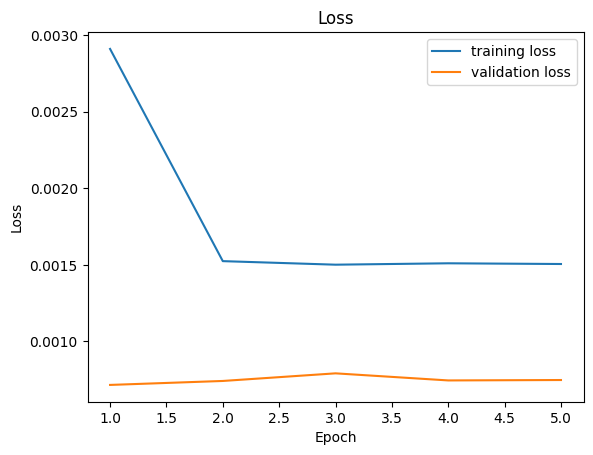

In [ ]:
numOfEpoch = 5
plt.plot(list(map(int, np.linspace(1, numOfEpoch, 5))), history.history['loss'], label='training loss')
plt.plot(list(map(int, np.linspace(1, numOfEpoch, 5))), history.history['val_loss'], label='validation loss')
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Test

In [ ]:
df_test = my_min_max_scaler(y_center_df_test,1079.0)
X_x  = df_test[:,: (df_test.shape[1]-1)]
y_x = df_test[:,(df_test.shape[1] -1)]
print(X_x.shape)
print(y_x.shape)

(319372, 20)
(319372,)


In [ ]:
X_x = X_x.reshape((X_x.shape[0],X_x.shape[1],1))
model = load_model("/content/drive/MyDrive/Warning_collision/Best model for x/LSTM_y.h5")
model.evaluate(X_x,y_x)

9981/9981 [==============================] - 43s 4ms/step - loss: 0.0051


0.005073957610875368

##Test NN

In [ ]:
model = load_model("/content/drive/MyDrive/Warning_collision/Best model for x/nn_y.h5")
model.evaluate(X_x,y_x)

9981/9981 [==============================] - 20s 2ms/step - loss: 0.0010


0.0010462329955771565

##Model : cảnh báo va chạm
##XE 1

In [ ]:
x_start1 = np.array([1037, 1037, 1037, 1038, 1038, 1038, 1038, 1038, 1038, 1037, 1038, 1037, 1038, 1038, 1038, 1038, 1038, 1038, 1038, 1038])
y_start1 = np.array([345, 345, 345, 345, 345, 345, 345, 345, 345, 345, 345, 345, 345, 346, 345, 346, 345, 345, 345, 345])
x_end1 = np.array([1054, 1054, 1054, 1055, 1055, 1055, 1055, 1055, 1055, 1055, 1055, 1054, 1055, 1054, 1055, 1055, 1055, 1055, 1055, 1055])
y_end1 = np.array([394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 395, 395, 395, 395, 395, 395, 395, 395, 395])

In [ ]:
w1 = (x_start1[0] - x_end1[0])**2
h1 = (y_start1[0] - y_end1[0])**2

In [ ]:
x_center1 = (x_start1 + x_end1) /2
y_center1 = (y_start1 + y_end1) /2

##XE 2

In [ ]:
x_start2 = np.array([1040, 1040, 1040, 1041, 1041, 1041, 1041, 1041, 1042, 1042, 1043, 1043, 1044, 1045, 1045, 1046, 1047, 1047, 1048, 1049])
y_start2 = np.array([348, 348, 348, 349, 349, 349, 350, 350, 351, 352, 352, 352, 353, 354, 354, 354, 354, 354, 348, 349])
x_end2 = np.array([1055, 1056, 1055, 1056, 1056, 1056, 1056, 1056, 1056, 1056, 1056, 1056, 1056, 1056, 1056, 1056, 1057, 1057, 1057, 1057])
y_end2 = np.array([394, 394, 394, 395, 395, 396, 397, 397, 398, 398, 398, 398, 398, 400, 400, 400, 400, 401, 401, 402])

In [ ]:
w2 = (x_start2[0] - x_end2[0])**2
h2 = (y_start2[0] - y_end2[0])**2
x_center2 = (x_start2 +x_end2) /2
y_center2 = (y_start2 + y_end2) /2

In [ ]:
from math import *
import numpy as np

def alarm_collision(model_x, model_y, x_s1, x_s2, y_s1, y_s2, num_frame, w1, h1, w2, h2, C=2):
    # num_frame là dự đoán sơm hơn bao nhiêu frame
    # chuẩn hóa vector ban đầu sau 20 frame
    x_c1 = my_min_max_scaler(x_s1, 1599.0)
    y_c1 = my_min_max_scaler(y_s1, 1079.0)

    x_c2 = my_min_max_scaler(x_s2, 1599.0)
    y_c2 = my_min_max_scaler(y_s2, 1079.0)
    print("x1\t y1\t x2\t y2\t")
    # dự đoán thêm nhiều frame tiếp theo 1 2 3 -> 4 sau đó 2 3 4 ->5
    for i in range(num_frame):
        next_x1 = model_x.predict(x_c1.reshape((1, 20, 1)))[0]
        next_y1 = model_y.predict(y_c1.reshape((1, 20, 1)))[0]
        next_x2 = model_x.predict(x_c2.reshape((1, 20, 1)))[0]
        next_y2 = model_y.predict(y_c2.reshape((1, 20, 1)))[0]

        if (abs(next_x1 - next_x2) <= (w1 / 2 + w2 / 2 + C)) or (abs(next_x2 - next_y2) <= (h1 / 2 + h2 / 2 + C)):
            print("Warning collision :<")
        print("{}\t {}\t {}\t {}\t".format(next_x1 * 1599, next_y1 * 1079, next_x2 * 1599, next_y2 * 1079))

        # Cập nhật x_c1, x_c2, y_c1, y_c2 với giá trị mới
        x_c1 = np.append(x_c1[1:], next_x1).reshape(-1, 1)
        y_c1 = np.append(y_c1[1:], next_y1).reshape(-1, 1)
        x_c2 = np.append(x_c2[1:], next_x2).reshape(-1, 1)
        y_c2 = np.append(y_c2[1:], next_y2).reshape(-1, 1)

# Dummy implementation of the scaler for testing
def my_min_max_scaler(arr, max_value):
    return np.array(arr) / max_value

# Dummy models for testing
class DummyModel:
    def predict(self, data):
        return np.array([0.5])

# Test the function
x_s1 = np.random.rand(20)
x_s2 = np.random.rand(20)
y_s1 = np.random.rand(20)
y_s2 = np.random.rand(20)
model_x = DummyModel()
model_y = DummyModel()


In [ ]:
model_x = load_model("/content/drive/MyDrive/Warning_collision/Best model for x/LSTM_x.h5")
model_y = load_model("/content/drive/MyDrive/Warning_collision/Best model for x/LSTM_y.h5")

In [ ]:
alarm_collision(model_x, model_y, x_center1, y_center1, x_center2, y_center2, 10, w1, h1, w2, h2)

x1	 y1	 x2	 y2	
Warning collision :<
799.5	 539.5	 799.5	 539.5	
Warning collision :<
799.5	 539.5	 799.5	 539.5	
Warning collision :<
799.5	 539.5	 799.5	 539.5	
Warning collision :<
799.5	 539.5	 799.5	 539.5	
Warning collision :<
799.5	 539.5	 799.5	 539.5	
Warning collision :<
799.5	 539.5	 799.5	 539.5	
Warning collision :<
799.5	 539.5	 799.5	 539.5	
Warning collision :<
799.5	 539.5	 799.5	 539.5	
Warning collision :<
799.5	 539.5	 799.5	 539.5	
Warning collision :<
799.5	 539.5	 799.5	 539.5	
